# Video Game Sales Data Exploration
### This notebook aims to perform exploratory data analysis of the video games sales data found at: https://www.kaggle.com/gregorut/videogamesales?select=vgsales.csv 
#### By Elliot Taylor

First we will import all of the needed libraries and load the dataset into a data frame.

In [78]:
import pandas as pandas
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [63]:
df = pd.read_csv("vgsales.csv")

We can see that the dataset is a relatively simple set that includes a ranking of the game by global sales, its Name, the platform it was made for, the year it was released, genre of the game, who published it and then sales by region. 

In [64]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [65]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


We can see that the Year column has some rows with missing or NA values we will remove these rows.

In [66]:
df["Year"].isna().sum()

271

In [67]:
df.dropna(axis=0, inplace=True)

In [68]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


We can also see Year is of type Float64 we will convert this to an Int which better represents a year. 

In [69]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [70]:
df = df.astype({'Year': 'int64'})

In [71]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

Also as this dataset is from 2016 we can assume any entries from after that time are errors and can also be removed from the dataset. We will replace these with 2016.

In [72]:
df[df["Year"]>2016]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.0,0.03,0.00,0.03
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01
16438,16441,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01


In [73]:
df['Year'].replace(2020,2016, inplace=True)
df['Year'].replace(2017,2016, inplace=True)

In [74]:
df[df["Year"]>2016]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


With the data formatted how we want it and incomplete entries removed we can begin data exploration.

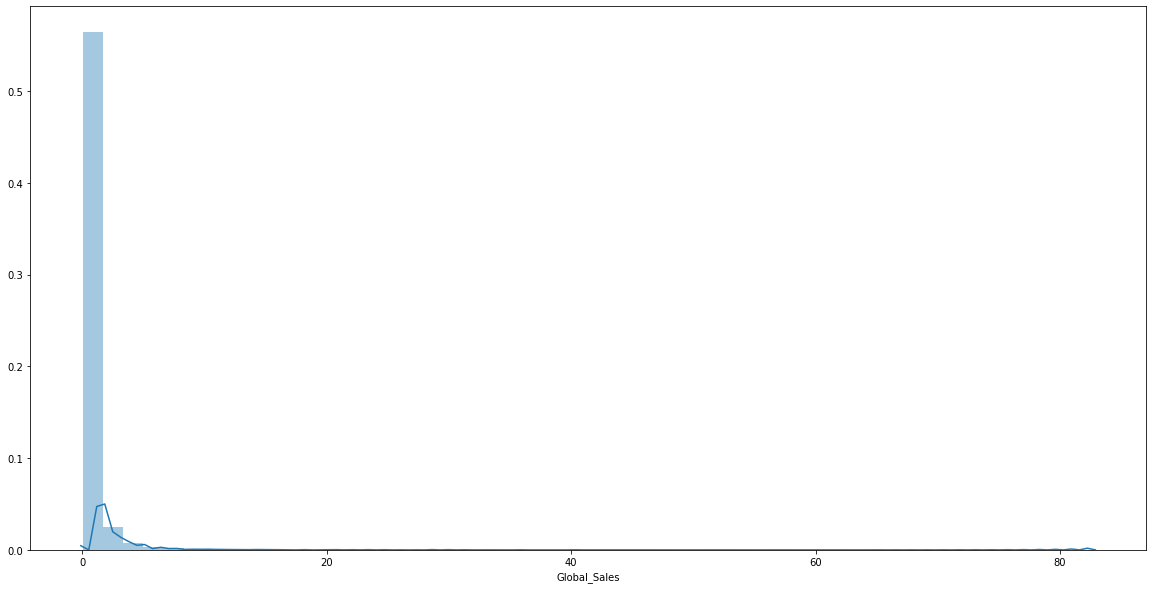

In [85]:
ax = plt.subplots(figsize=(20, 10))
ax = sns.distplot(df['Global_Sales'])

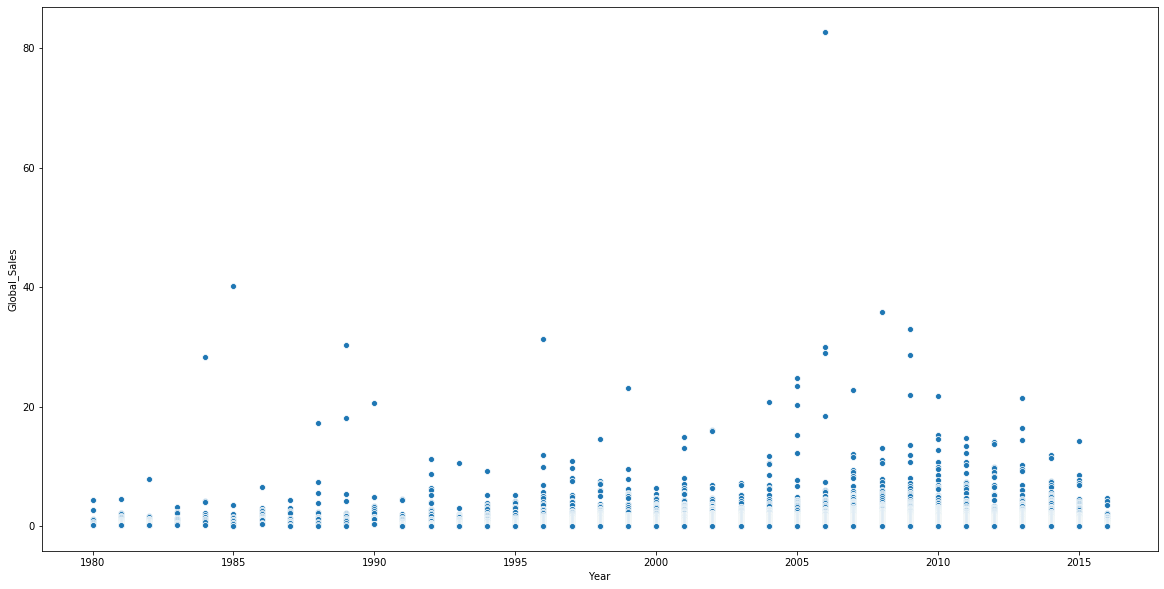

In [87]:
ax = plt.subplots(figsize=(20, 10))
ax = sns.scatterplot(x="Year", y="Global_Sales", data=df)

In [189]:
df_pub = df.groupby(['Publisher']).sum().reset_index()
df_pub10 = df_pub.sort_values('Global_Sales', ascending=False).head(10)
df_pub10

,Publisher,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
359,Nintendo,2646098,1394666,815.75,418.30,454.99,95.19,1784.43
138,Electronic Arts,7102442,2686562,584.22,367.38,13.98,127.63,1093.39
21,Activision,6324706,1938979,426.01,213.72,6.54,74.79,721.41
455,Sony Computer Entertainment,4098421,1367034,265.22,187.55,74.10,80.40,607.28
524,Ubisoft,6945872,1843190,252.81,163.03,7.33,50.16,473.54
493,Take-Two Interactive,2615467,827344,220.47,117.95,5.83,55.20,399.30
487,THQ,4739413,1428311,208.60,94.60,5.01,32.11,340.44
275,Konami Digital Entertainment,7270213,1650392,88.91,68.62,90.93,29.91,278.56
445,Sega,5011632,1267393,108.78,81.41,56.19,24.30,270.70
347,Namco Bandai Games,8696058,1863670,69.38,42.61,126.84,14.64,253.65


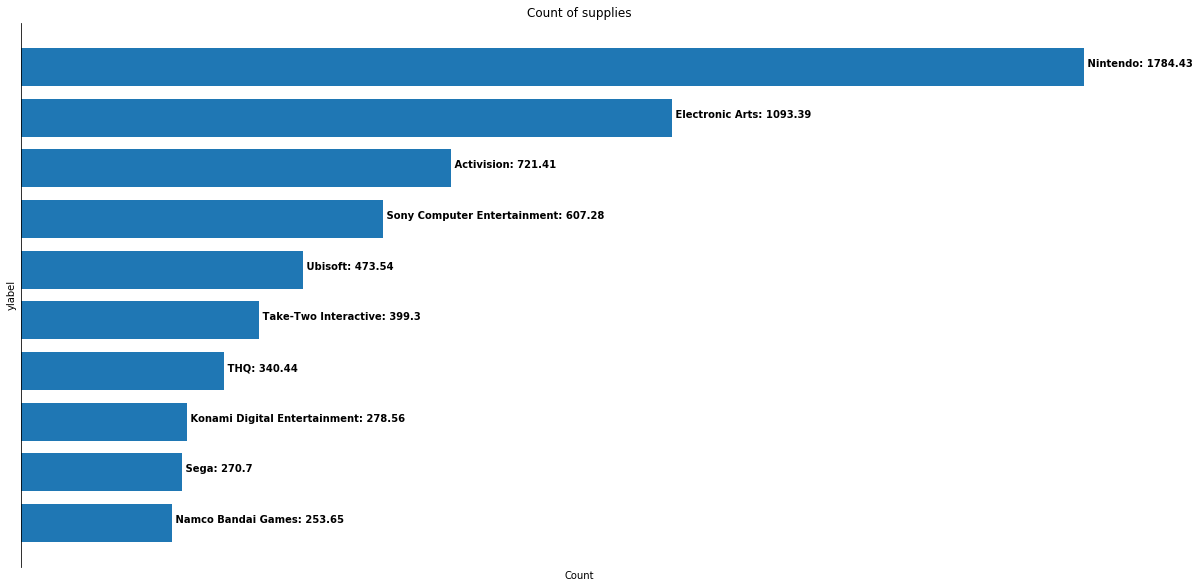

In [283]:
x = df_pub10['Publisher']
y = df_pub10['Global_Sales'].round(2)
fig, ax = plt.subplots(figsize=(20,10))    
width = 0.75 # the width of the bars 
ax.barh(x, y, width)

plt.gca().invert_yaxis()
plt.title('Count of supplies')
plt.xlabel('Count')
plt.ylabel('ylabel')

x.index = np.arange(len(x))

for i, v in enumerate(y):
    ax.text(v , i + 0," "+ x[i] + ": " + str(v), color='black', fontweight='bold')

ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])
plt.xlabel('Count')
plt.ylabel('ylabel')
    
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)

In [266]:
x[0]

'Nintendo'

KeyError: 0